# Problem:2 

## Rose.csv

### For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.


In [142]:
##importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import plotly.offline as py
py.init_notebook_mode()
from pylab import rcParams

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn.metrics import  mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt



import os
os.getcwd()
os.chdir('C:\\Users\\harih\\Downloads\\Time Series Forecasting\\project')

### 2.1 Read the data as an appropriate Time Series data and plot the data.

In [143]:
rdf = pd.read_csv("Rose.csv",parse_dates=True,index_col=0)
rdf.squeeze()
rdf = pd.DataFrame(rdf)

In [144]:
rdf.head(2)

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0

In [145]:
rdf.tail(2)

Rose
YearMonth       
1995-06-01  40.0
1995-07-01  62.0

In [146]:
rdf.shape

(187, 1)

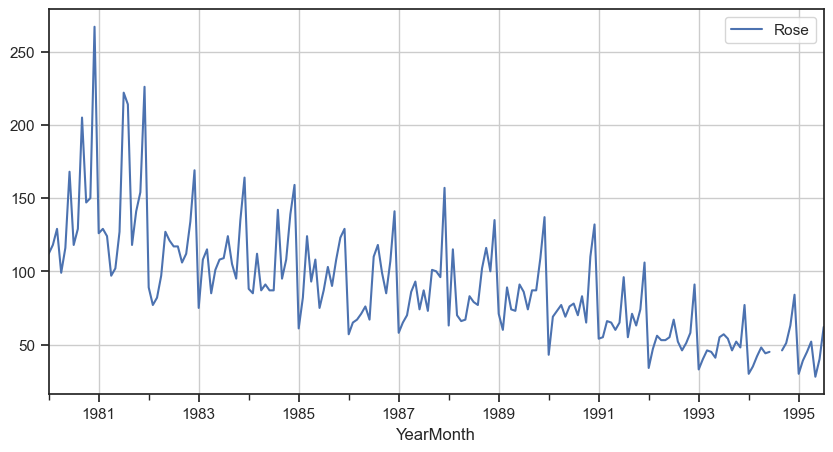

In [147]:
rdf.plot(figsize=(10,5))
plt.grid();

In [148]:
rdf['Year']=rdf.index.year
rdf['Month']=rdf.index.month
rdf.head()

Rose  Year  Month
YearMonth                     
1980-01-01  112.0  1980      1
1980-02-01  118.0  1980      2
1980-03-01  129.0  1980      3
1980-04-01   99.0  1980      4
1980-05-01  116.0  1980      5

In [149]:
rdf.columns=['Sales', 'Year', 'Month']
rdf.head()

Sales  Year  Month
YearMonth                     
1980-01-01  112.0  1980      1
1980-02-01  118.0  1980      2
1980-03-01  129.0  1980      3
1980-04-01   99.0  1980      4
1980-05-01  116.0  1980      5

In [150]:
rdf.shape

(187, 3)

In [151]:
rdf.head(3)

Sales  Year  Month
YearMonth                     
1980-01-01  112.0  1980      1
1980-02-01  118.0  1980      2
1980-03-01  129.0  1980      3

### 2.2 Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [152]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   185 non-null    float64
 1   Year    187 non-null    int32  
 2   Month   187 non-null    int32  
dtypes: float64(1), int32(2)
memory usage: 4.4 KB


In [153]:
rdf.describe().T.round(2)

count     mean    std     min     25%     50%     75%     max
Sales  185.0    90.39  39.18    28.0    63.0    86.0   112.0   267.0
Year   187.0  1987.30   4.51  1980.0  1983.0  1987.0  1991.0  1995.0
Month  187.0     6.41   3.45     1.0     3.0     6.0     9.0    12.0

In [154]:
rdf.isnull().sum()

Sales    2
Year     0
Month    0
dtype: int64

- 2 missing values in Sales

#### Treating Missing values

In [155]:
rdf[rdf['Sales'].isna()]

Sales  Year  Month
YearMonth                     
1994-07-01    NaN  1994      7
1994-08-01    NaN  1994      8

In [156]:
rdf['Sales_Mean']=rdf['Sales']

In [157]:
np.mean(rdf[rdf.Month==7]['1993-07-01':'1995-07-01']['Sales'])

59.5

In [158]:
rdf.loc['1994-07-01', 'Sales_Mean']=np.mean(
    rdf[rdf.Month==7]['1993-07-01':'1995-07-01']['Sales'])
rdf.loc['1994-08-01', 'Sales_Mean']=np.mean(
    rdf[rdf.Month==8]['1993-08-01':'1995-08-01']['Sales'])

rdf[rdf['Sales_Mean'].isna()]

Empty DataFrame
Columns: [Sales, Year, Month, Sales_Mean]
Index: []

In [159]:
rdf.loc['1994-07-01':'1994-08-01']

Sales  Year  Month  Sales_Mean
YearMonth                                 
1994-07-01    NaN  1994      7        59.5
1994-08-01    NaN  1994      8        54.0

In [160]:
rdf[rdf.Month==7]

Sales  Year  Month  Sales_Mean
YearMonth                                 
1980-07-01  118.0  1980      7       118.0
1981-07-01  222.0  1981      7       222.0
1982-07-01  117.0  1982      7       117.0
1983-07-01  109.0  1983      7       109.0
1984-07-01   87.0  1984      7        87.0
1985-07-01   87.0  1985      7        87.0
1986-07-01  110.0  1986      7       110.0
1987-07-01   87.0  1987      7        87.0
1988-07-01   79.0  1988      7        79.0
1989-07-01   86.0  1989      7        86.0
1990-07-01   78.0  1990      7        78.0
1991-07-01   96.0  1991      7        96.0
1992-07-01   67.0  1992      7        67.0
1993-07-01   57.0  1993      7        57.0
1994-07-01    NaN  1994      7        59.5
1995-07-01   62.0  1995      7        62.0

In [161]:
rdf[rdf.Month==8]

Sales  Year  Month  Sales_Mean
YearMonth                                 
1980-08-01  129.0  1980      8       129.0
1981-08-01  214.0  1981      8       214.0
1982-08-01  117.0  1982      8       117.0
1983-08-01  124.0  1983      8       124.0
1984-08-01  142.0  1984      8       142.0
1985-08-01  103.0  1985      8       103.0
1986-08-01  118.0  1986      8       118.0
1987-08-01   73.0  1987      8        73.0
1988-08-01   77.0  1988      8        77.0
1989-08-01   74.0  1989      8        74.0
1990-08-01   70.0  1990      8        70.0
1991-08-01   55.0  1991      8        55.0
1992-08-01   52.0  1992      8        52.0
1993-08-01   54.0  1993      8        54.0
1994-08-01    NaN  1994      8        54.0

In [162]:
rdf.drop(['Sales'],inplace=True,axis=1)

rdf.head()

Year  Month  Sales_Mean
YearMonth                          
1980-01-01  1980      1       112.0
1980-02-01  1980      2       118.0
1980-03-01  1980      3       129.0
1980-04-01  1980      4        99.0
1980-05-01  1980      5       116.0

In [163]:
# fill missing values in sales with the mean
rdf.columns=['Year', 'Month', 'Sales']
rdf.isnull().sum()

Year     0
Month    0
Sales    0
dtype: int64

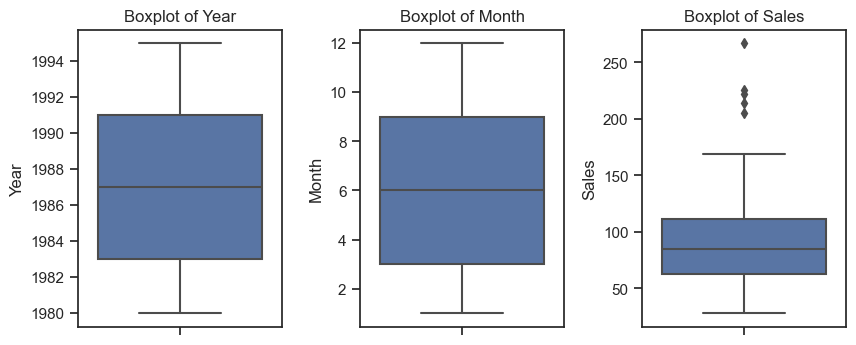

In [164]:
df_boxplot=rdf
plt.figure(figsize = (20,10))
feature_list = df_boxplot.columns
for i in range(len(feature_list)):
    plt.subplot(3, 7, i + 1)
    sns.boxplot(y = df_boxplot[feature_list[i]], data = df_boxplot)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

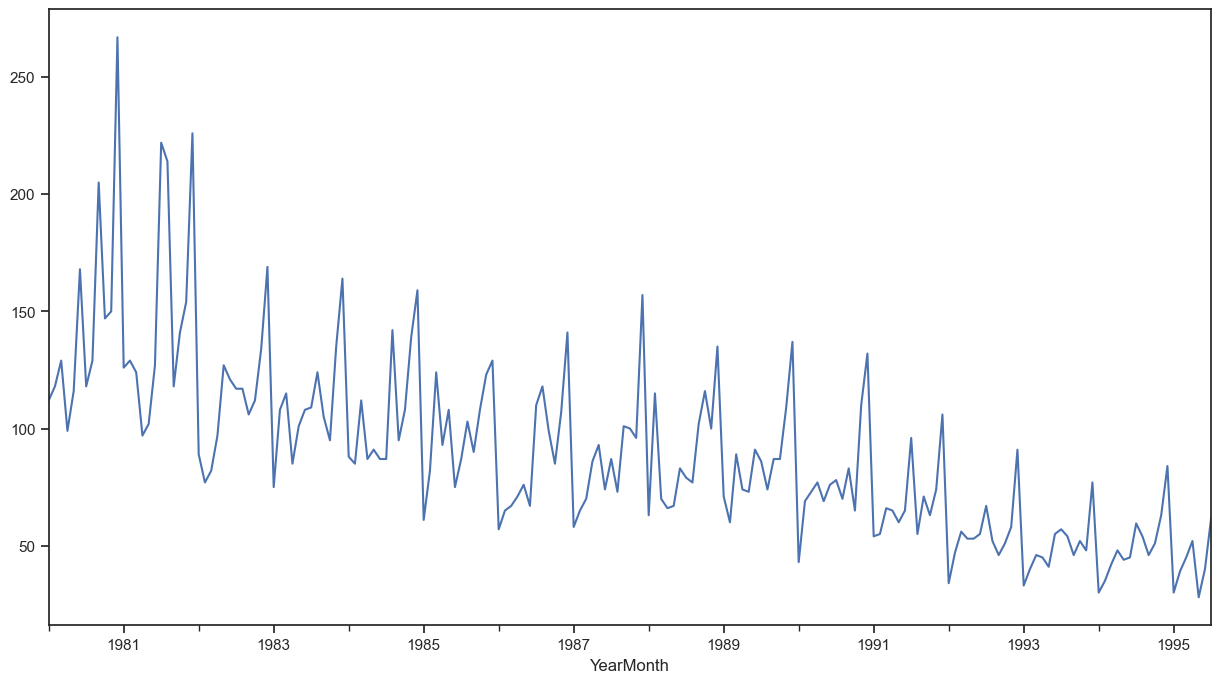

In [165]:
plt.figure(figsize=(15,8))
rdf['Sales'].plot();

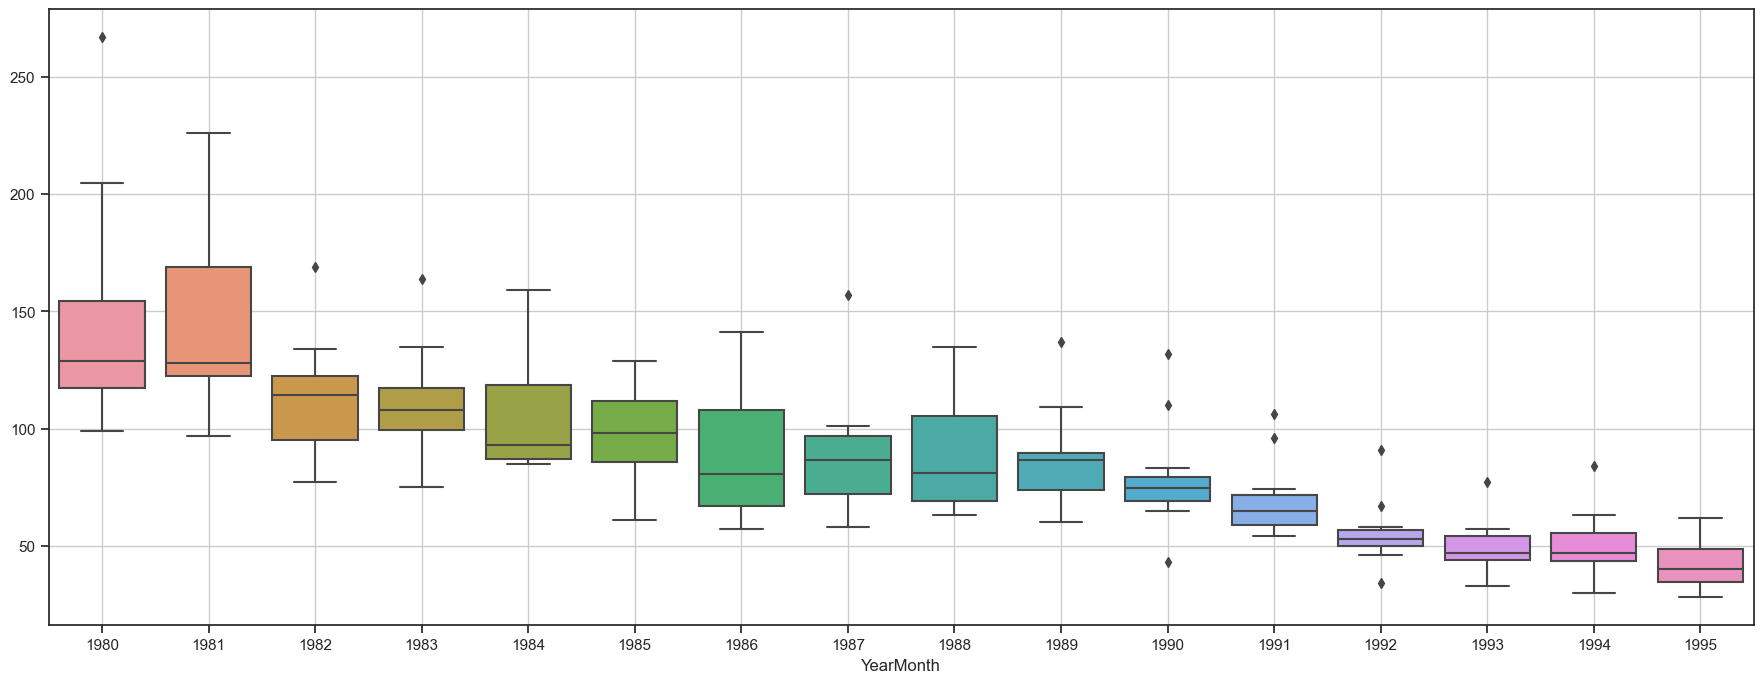

In [166]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = rdf.index.year,y = rdf.values[:,2],ax=ax)
plt.grid();

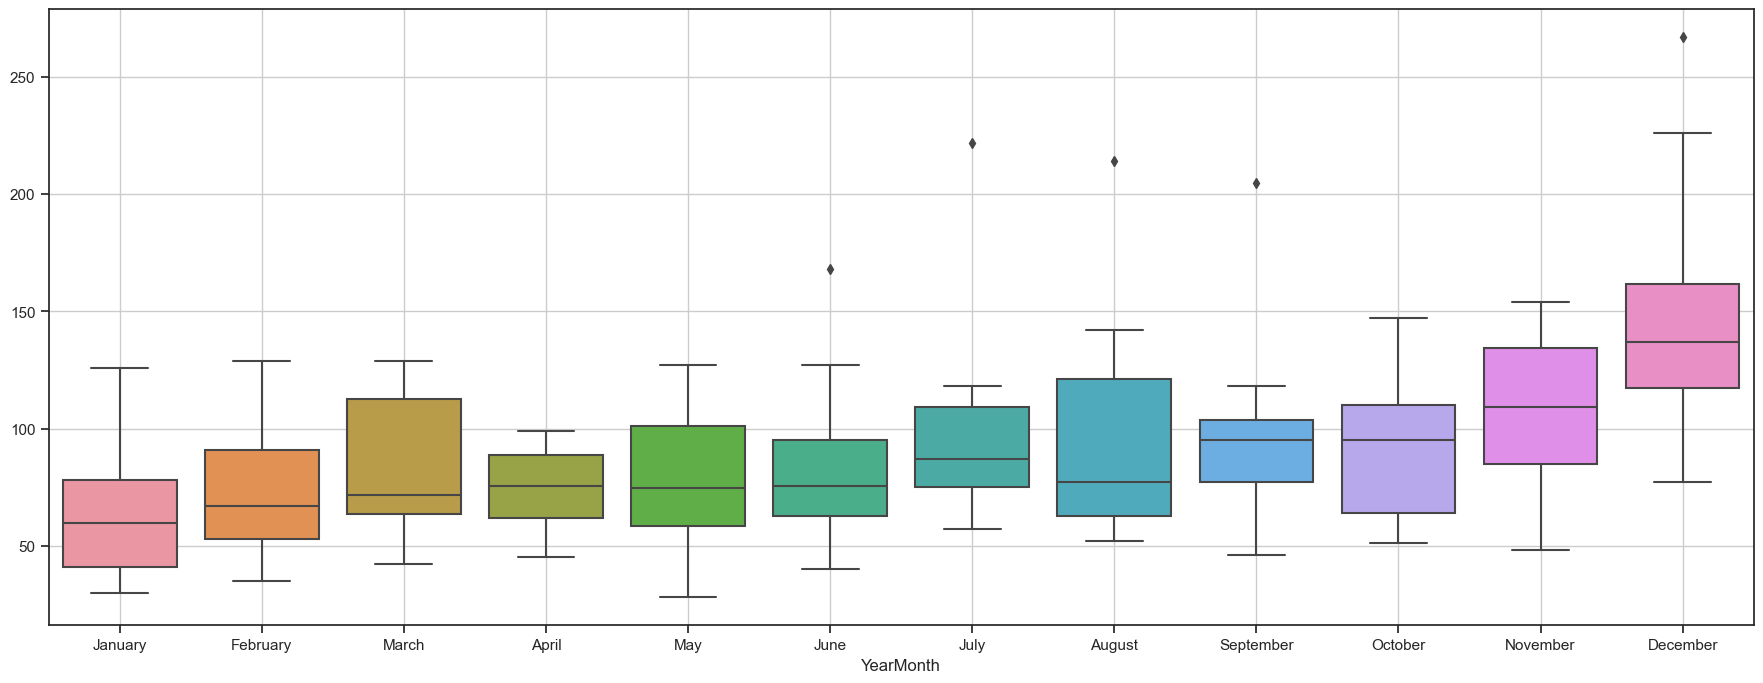

In [167]:
#monthly
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = rdf.index.month_name(),y = rdf.values[:,2],ax=ax)
plt.grid();

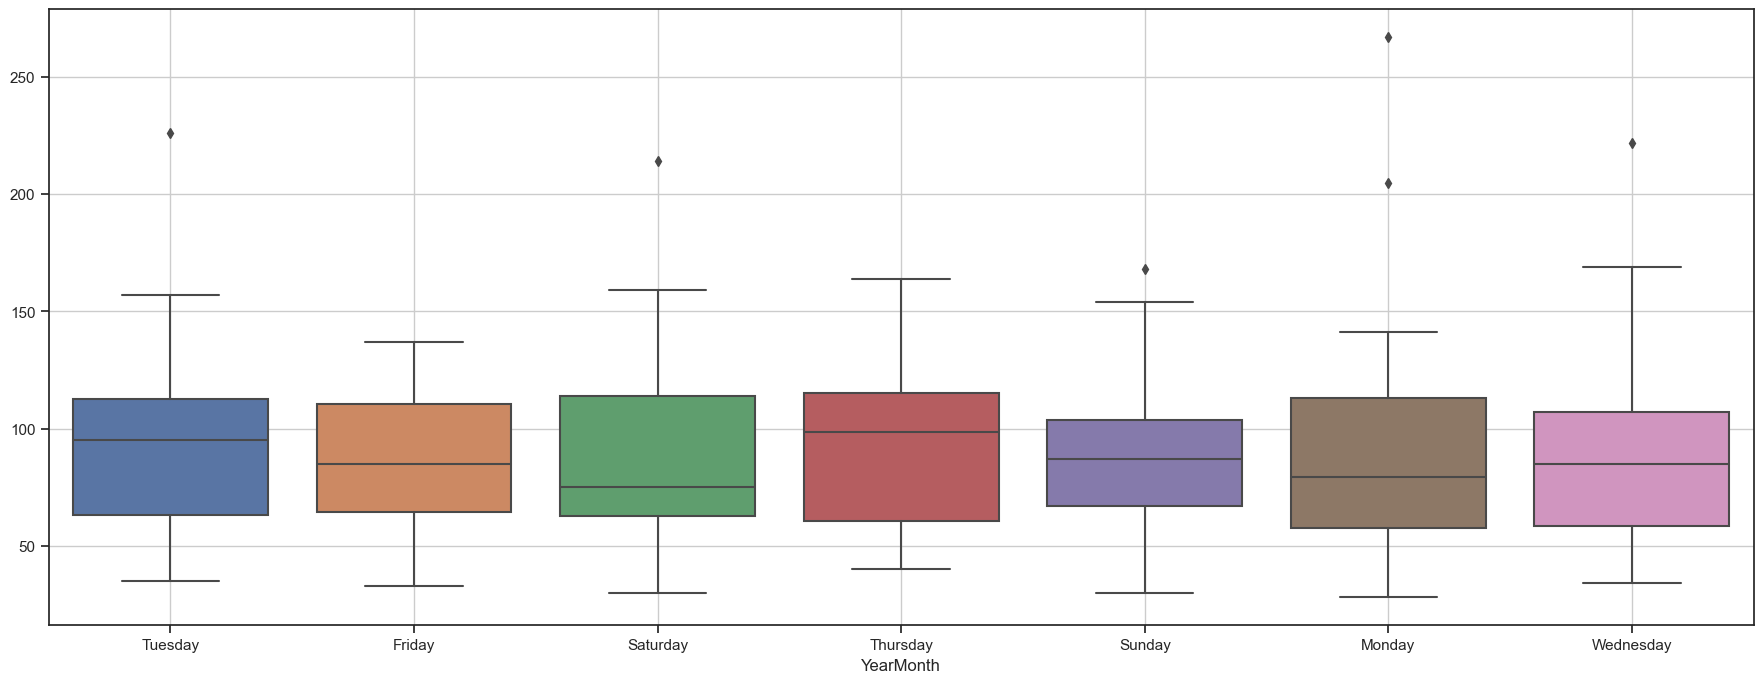

In [168]:
#Weekly
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = rdf.index.day_name(),y = rdf.values[:,2],ax=ax)
plt.grid();

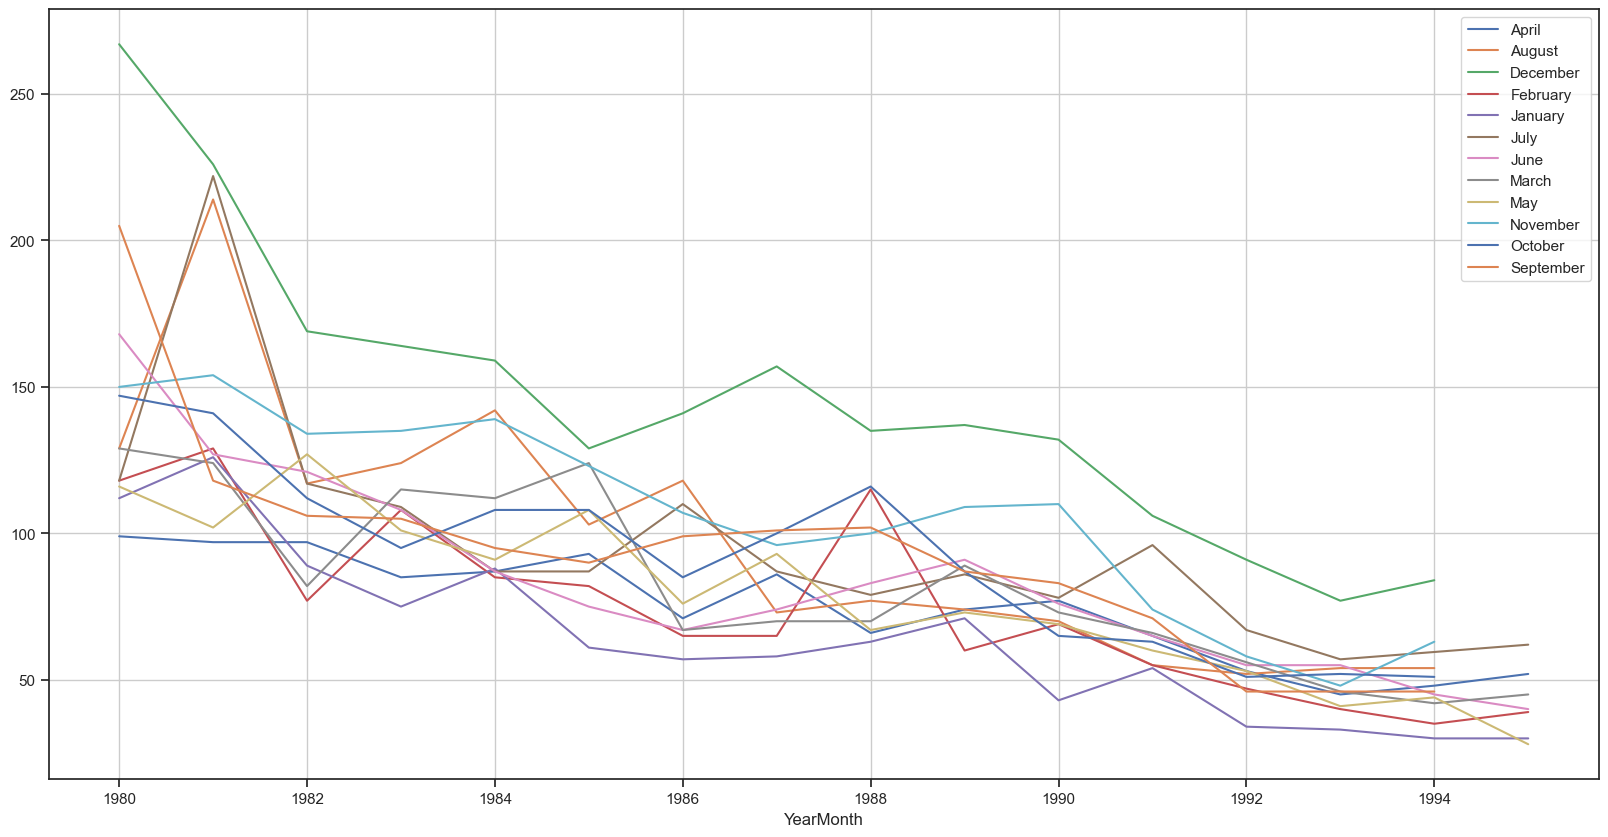

In [169]:
monthly_sales_across_years = pd.pivot_table(rdf, values = 'Sales', columns = rdf.index.month_name(), index = rdf.index.year)
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

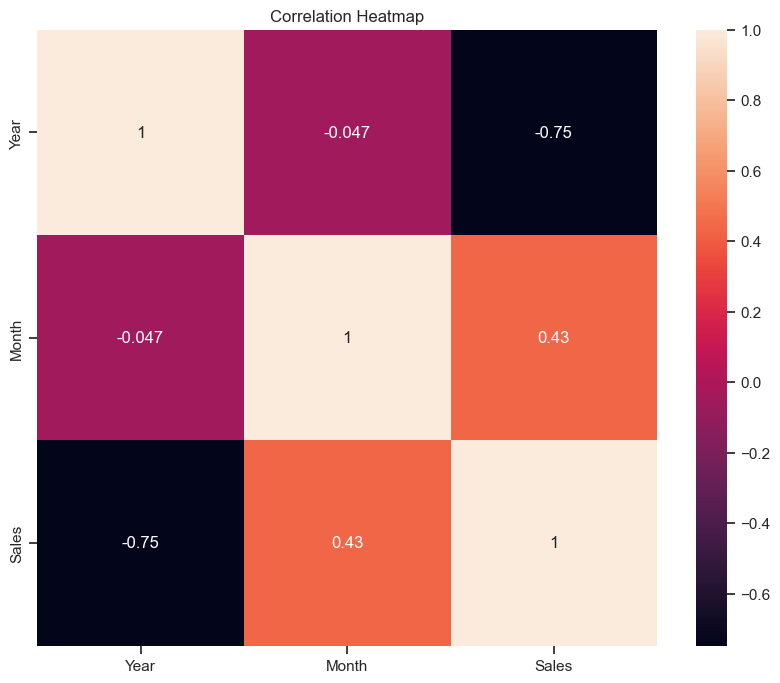

In [170]:
plt.figure(figsize=(10,8))
sns.heatmap(rdf.corr(),annot=True)
plt.title('Correlation Heatmap');
plt.show()

In [171]:
rdf_decade_sum = rdf.resample('10Y').sum()
rdf_decade_sum

Year  Month    Sales
YearMonth                         
1980-12-31   23760     78   1758.0
1990-12-31  238260    780  12094.0
2000-12-31  109605    340   2984.5

### ECDF Plot :::. Empirical Cumulative Distribution Function

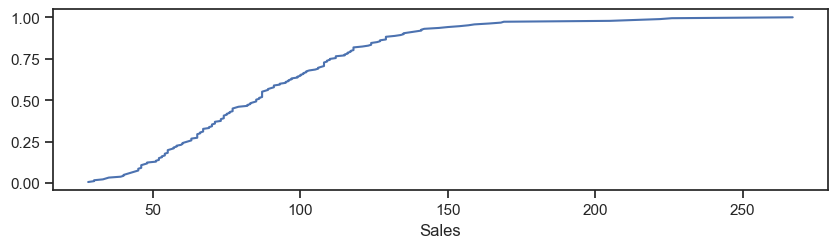

In [172]:
from statsmodels.distributions.empirical_distribution import ECDF

sns.set(style = "ticks") 
plt.figure(figsize = (10,8))

plt.subplot(312)
ecdf = ECDF(rdf['Sales'])
plt.plot(ecdf.x, ecdf.y, label = "statmodels")
plt.xlabel('Sales');

### Decomposing the Time Series

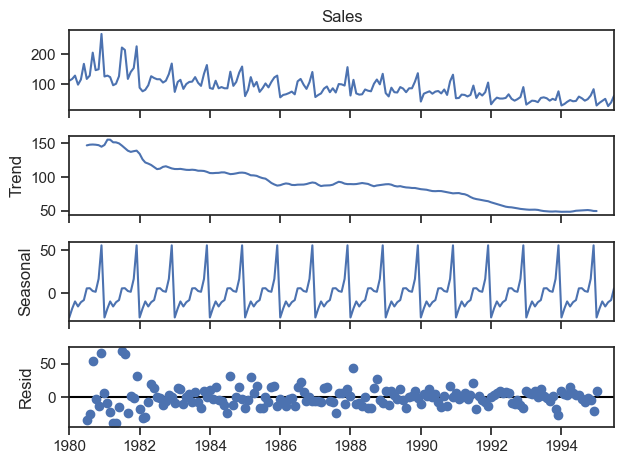

In [173]:
decomposition = seasonal_decompose(rdf['Sales'],model='additive')
decomposition.plot();

In [174]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -28.031994
1980-02-01   -17.543105
1980-03-01    -9.418105
1980-04-01   -15.230605
1980-05-01   -10.328819
1980-06-01    -7.810962
1980-07-01     5.718006
1980-08-01     5.931895
1980-09-01     2.651339
1980-10-01     1.748562
1980-11-01    16.723562
1980-12-01    55.590228
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
1980-06-01          NaN
1980-07-01   -34.801339
1980-08-01   -25.056895
1980-09-01    53.973661
1980-10-01    -2.831895
1980-11-01   -14.140228
1980-12-01    66.28477

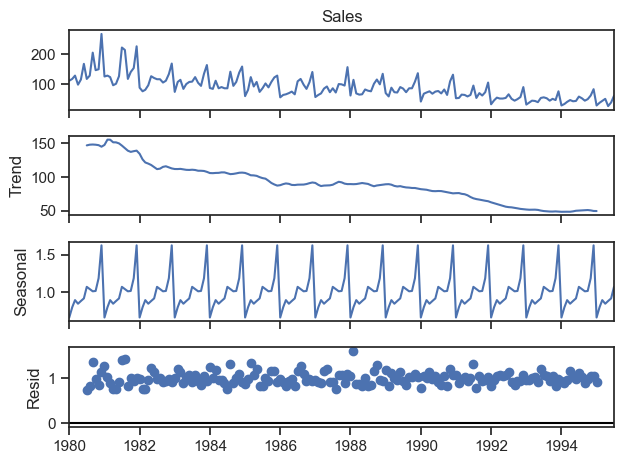

In [175]:
decomposition_mult = seasonal_decompose(rdf['Sales'],model='multiplicative')
decomposition_mult.plot();

In [176]:
trend = decomposition_mult.trend
seasonality = decomposition_mult.seasonal
residual = decomposition_mult.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.668577
1980-02-01    0.804550
1980-03-01    0.898744
1980-04-01    0.851237
1980-05-01    0.886934
1980-06-01    0.921546
1980-07-01    1.074644
1980-08-01    1.044683
1980-09-01    1.015406
1980-10-01    1.020108
1980-11-01    1.189232
1980-12-01    1.624338
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.746542
1980-08-01    0.833636
1980-09-01    1.360672
1980-10-01    0.973117
1980-11-01    0.855614
1980-12-01    1.132642
Name: resid, dtype: fl

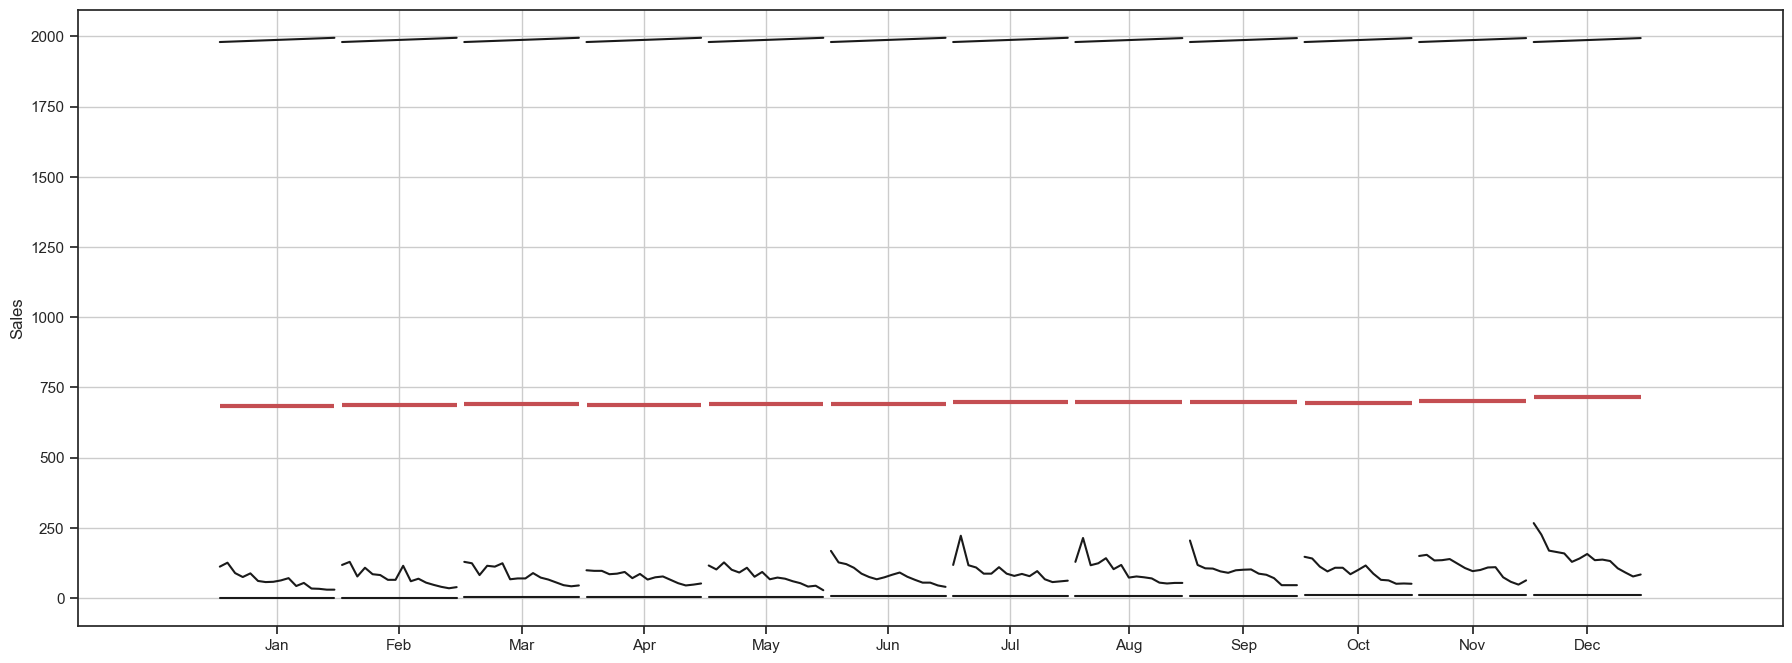

In [177]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(rdf,ylabel='Sales',ax=ax)
plt.grid();

## 2.3 Split the data into training and test. The test data should start in 1991.

In [178]:
# Split the data into training and testing sets
train = rdf[rdf.index < '1991-01-01']
test = rdf[rdf.index >= '1991-01-01']

In [179]:
print('Shape of datasets:')
print("train dataset: ",train.shape)
print("test dataset: ",test.shape,'\n')
print('Rows of dataset: ')
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

Shape of datasets:
train dataset:  (132, 3)
test dataset:  (55, 3) 

Rows of dataset: 
First few rows of Training Data 
             Year  Month  Sales
YearMonth                     
1980-01-01  1980      1  112.0
1980-02-01  1980      2  118.0
1980-03-01  1980      3  129.0
1980-04-01  1980      4   99.0
1980-05-01  1980      5  116.0 

Last few rows of Training Data 
             Year  Month  Sales
YearMonth                     
1990-08-01  1990      8   70.0
1990-09-01  1990      9   83.0
1990-10-01  1990     10   65.0
1990-11-01  1990     11  110.0
1990-12-01  1990     12  132.0 

First few rows of Test Data 
             Year  Month  Sales
YearMonth                     
1991-01-01  1991      1   54.0
1991-02-01  1991      2   55.0
1991-03-01  1991      3   66.0
1991-04-01  1991      4   65.0
1991-05-01  1991      5   60.0 

Last few rows of Test Data 
             Year  Month  Sales
YearMonth                     
1995-03-01  1995      3   45.0
1995-04-01  1995      4   52.0
1995-0

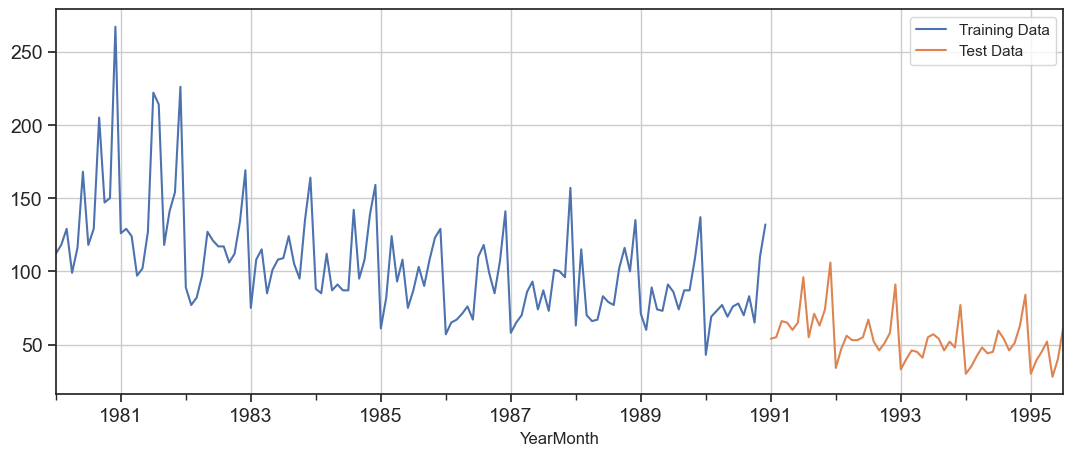

In [180]:
# Plot
train['Sales'].plot(figsize=(13,5), fontsize=14)
test['Sales'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

## 2.4 Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

### Model 1: Linear Regression

In [181]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]

print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


In [182]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Year  Month  Sales  time
YearMonth                           
1980-01-01  1980      1  112.0     1
1980-02-01  1980      2  118.0     2
1980-03-01  1980      3  129.0     3
1980-04-01  1980      4   99.0     4
1980-05-01  1980      5  116.0     5 

Last few rows of Training Data 
             Year  Month  Sales  time
YearMonth                           
1990-08-01  1990      8   70.0   128
1990-09-01  1990      9   83.0   129
1990-10-01  1990     10   65.0   130
1990-11-01  1990     11  110.0   131
1990-12-01  1990     12  132.0   132 

First few rows of Test Data 
             Year  Month  Sales  time
YearMonth                           
1991-01-01  1991      1   54.0    43
1991-02-01  1991      2   55.0    44
1991-03-01  1991      3   66.0    45
1991-04-01  1991      4   65.0    46
1991-05-01  1991      5   60.0    47 

Last few rows of Test Data 
             Year  Month  Sales  time
YearMonth                           
1995-03-01  1995 

In [183]:
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sales'].values)

LinearRegression()

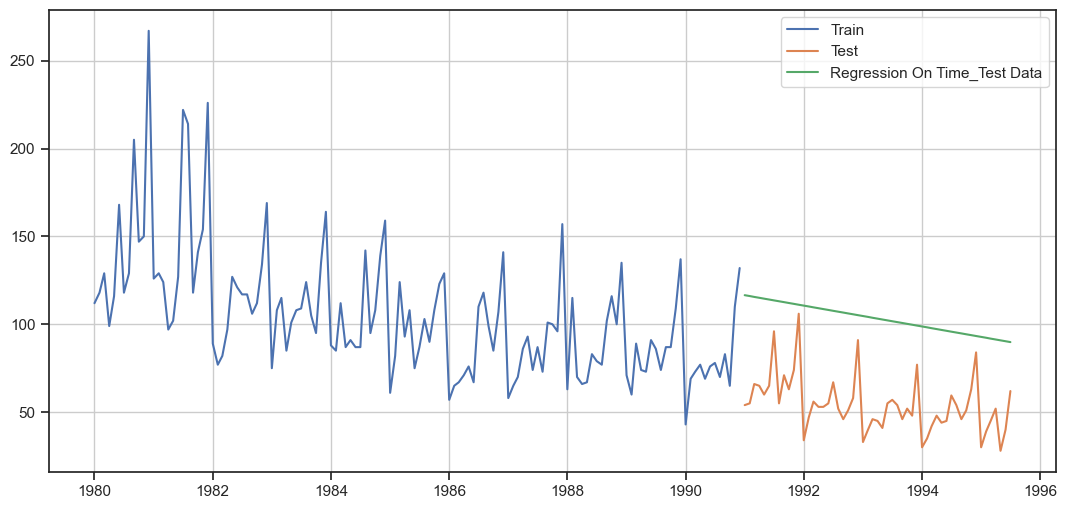

In [184]:
test_predictions_model1            = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

#### Model Evaluation

In [185]:
rmse_model1_test = metrics.mean_squared_error(test['Sales'],test_predictions_model1,squared=False)
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['Linear Regression'])
resultsDf

Test RMSE
Linear Regression  51.080941

### Model 2: Naive Method

In [186]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [187]:
NaiveModel_test['naive'] = np.asarray(train['Sales'])[len(np.asarray(train['Sales']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

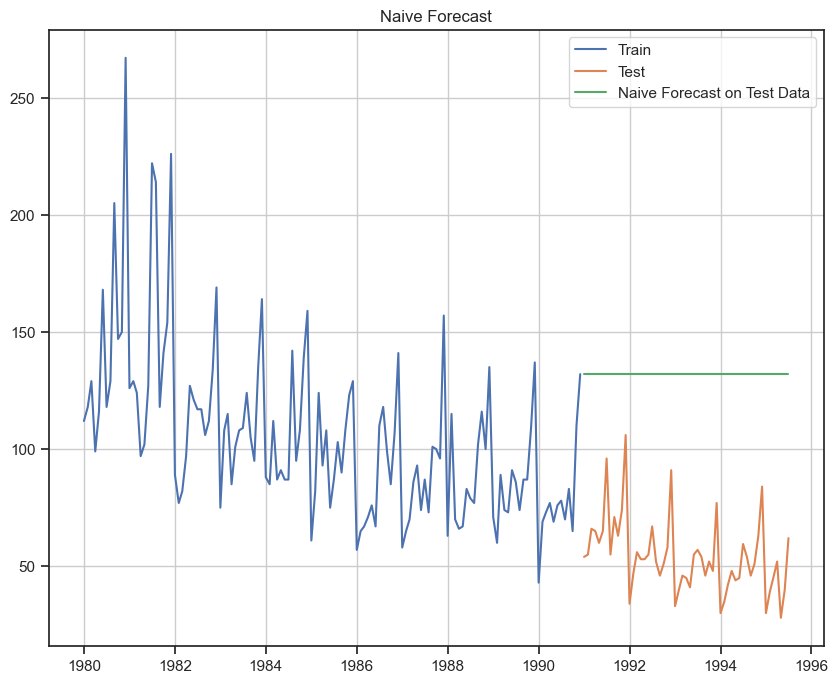

In [188]:
plt.figure(figsize=(10,8))
plt.plot(NaiveModel_train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

#### Model Evaluation

In [189]:
rmse_model2_test = metrics.mean_squared_error(test['Sales'],NaiveModel_test['naive'],squared=False)
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['Naive Model'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
Linear Regression  51.080941
Naive Model        79.304391

### Model 3: Simple Average

In [190]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [191]:
SimpleAverage_test['mean_forecast'] = train['Sales'].mean()
SimpleAverage_test.head()

Year  Month  Sales  mean_forecast
YearMonth                                    
1991-01-01  1991      1   54.0     104.939394
1991-02-01  1991      2   55.0     104.939394
1991-03-01  1991      3   66.0     104.939394
1991-04-01  1991      4   65.0     104.939394
1991-05-01  1991      5   60.0     104.939394

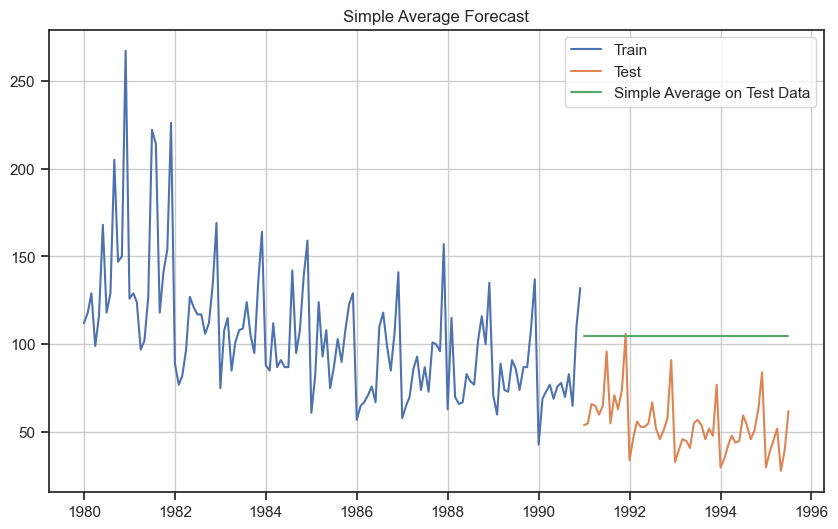

In [192]:
plt.figure(figsize=(10,6))
plt.plot(SimpleAverage_train['Sales'], label='Train')
plt.plot(SimpleAverage_test['Sales'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

#### Model Evaluation

In [193]:
rmse_model3_test = metrics.mean_squared_error(test['Sales'],SimpleAverage_test['mean_forecast'],squared=False)
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['Simple Average Model'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
Linear Regression     51.080941
Naive Model           79.304391
Simple Average Model  53.049755

### Model 4: Moving Average Method

In [194]:
MovingAverage = rdf.copy()
MovingAverage.head()

Year  Month  Sales
YearMonth                     
1980-01-01  1980      1  112.0
1980-02-01  1980      2  118.0
1980-03-01  1980      3  129.0
1980-04-01  1980      4   99.0
1980-05-01  1980      5  116.0

In [195]:
MovingAverage['Trailing_2'] = MovingAverage['Sales'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sales'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sales'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sales'].rolling(9).mean()

MovingAverage.head()

Year  Month  Sales  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                                     
1980-01-01  1980      1  112.0         NaN         NaN         NaN         NaN
1980-02-01  1980      2  118.0       115.0         NaN         NaN         NaN
1980-03-01  1980      3  129.0       123.5         NaN         NaN         NaN
1980-04-01  1980      4   99.0       114.0       114.5         NaN         NaN
1980-05-01  1980      5  116.0       107.5       115.5         NaN         NaN

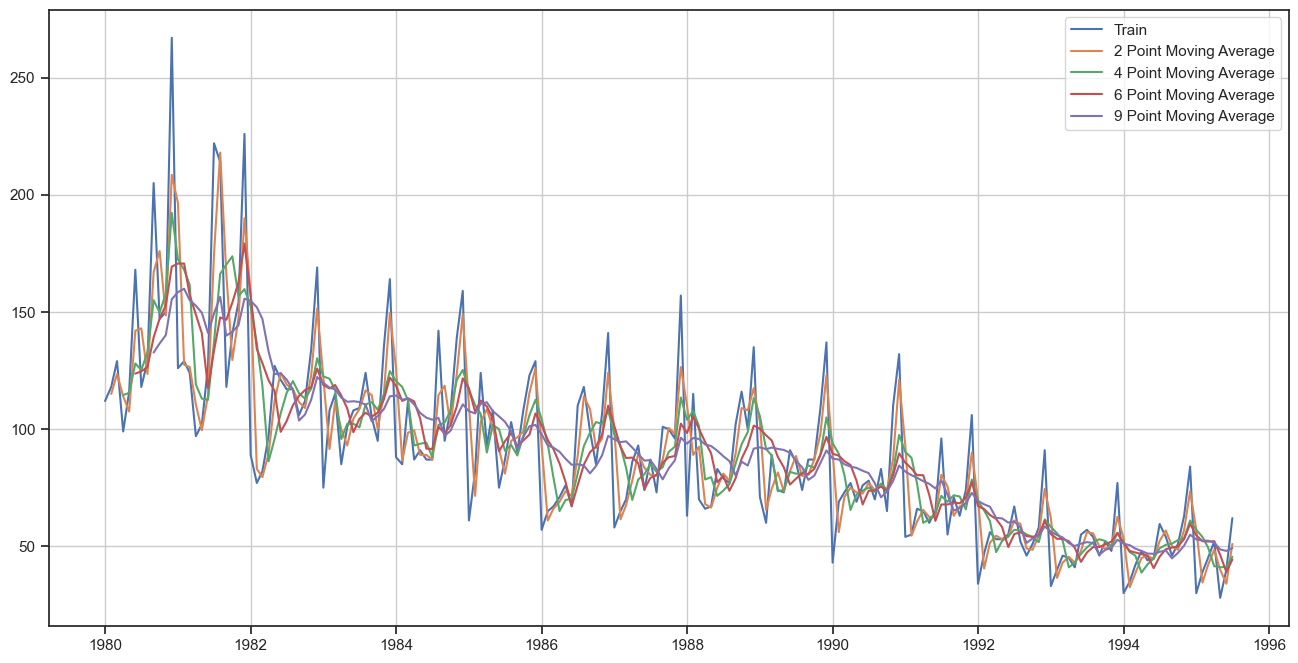

In [196]:
plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sales'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [197]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index < '1991-01-01']
trailing_MovingAverage_test=MovingAverage[MovingAverage.index >= '1991-01-01']
print(trailing_MovingAverage_test.shape)
print(trailing_MovingAverage_train.shape)

(55, 7)
(132, 7)


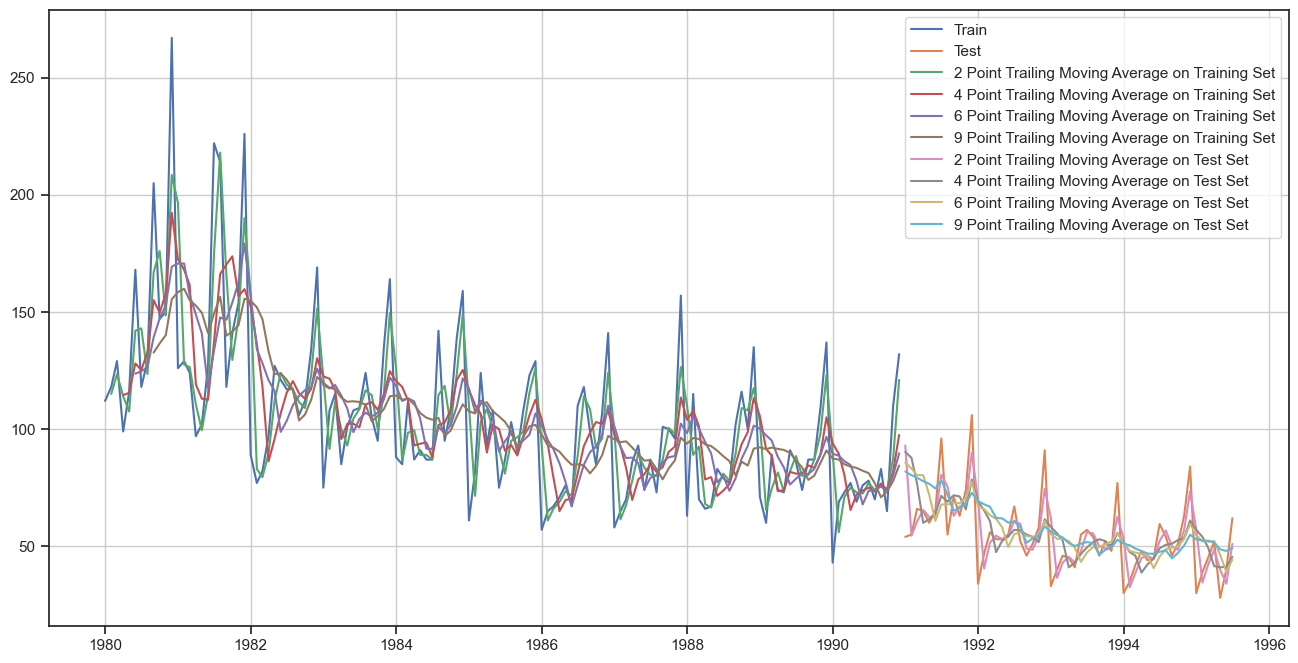

In [198]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sales'], label='Train')
plt.plot(trailing_MovingAverage_test['Sales'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

#### Model Evaluation

In [199]:
## Test Data - RMSE --> 2 point Trailing MA
rmse_model4_test_2 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_2'],squared=False)

## Test Data - RMSE  --> 4 point Trailing MA
rmse_model4_test_4 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_4'],squared=False)

## Test Data - RMSE --> 6 point Trailing MA
rmse_model4_test_6 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_6'],squared=False)

## Test Data - RMSE  --> 9 point Trailing MA
rmse_model4_test_9 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_9'],squared=False)

In [200]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
Linear Regression            51.080941
Naive Model                  79.304391
Simple Average Model         53.049755
2pointTrailingMovingAverage  11.589082
4pointTrailingMovingAverage  14.506190
6pointTrailingMovingAverage  14.558008
9pointTrailingMovingAverage  14.797139

### Model 5: Simple Exponential Smoothing

In [201]:
SES_train = train.copy()
SES_test = test.copy()

In [202]:
model_SES = SimpleExpSmoothing(SES_train['Sales'])

In [203]:
model_SES_autofit = model_SES.fit(optimized=True)

In [204]:
model_SES_autofit.params

{'smoothing_level': 0.12362013660706869,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [205]:
resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [206]:
## Test Data

#rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sales'],SES_test['predict'],squared=False)#
#print("For Alpha =0.9 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))#

In [207]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Year  Month  Sales    predict
YearMonth                                
1991-01-01  1991      1   54.0  87.983766
1991-02-01  1991      2   55.0  87.983766
1991-03-01  1991      3   66.0  87.983766
1991-04-01  1991      4   65.0  87.983766
1991-05-01  1991      5   60.0  87.983766

In [208]:
for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(SES_test))
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sales'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sales'],SES_test['predict',i],squared=False)
    
    resultsDf_temp = pd.concat([resultsDf_temp, pd.DataFrame.from_records([{'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}])], ignore_index=True)

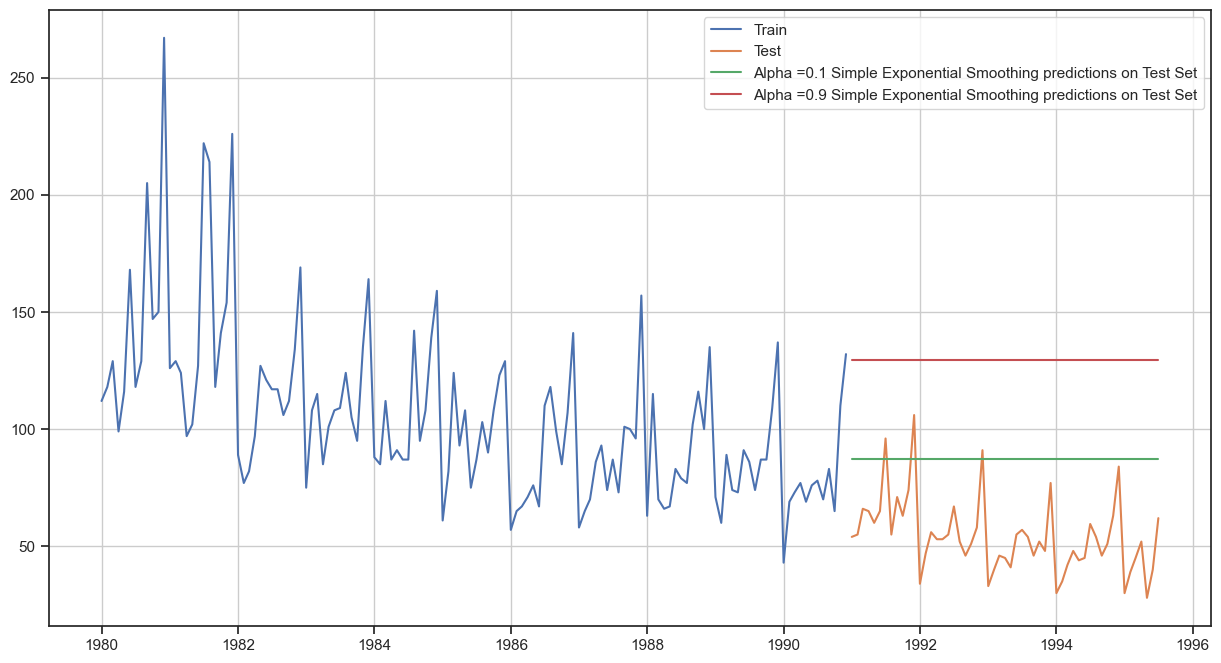

In [209]:
## Plotting on both the Training and Test data
plt.figure(figsize=(15,8))
plt.plot(SES_train['Sales'], label='Train')
plt.plot(SES_test['Sales'], label='Test')
plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.9], label='Alpha =0.9 Simple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

#### Model Evaluation

In [210]:
resultsDf_temp.sort_values(by=['Test RMSE']).head(9)

Alpha Values  Train RMSE  Test RMSE
0           0.1   31.815610  36.429535
1           0.2   31.979391  40.957988
2           0.3   32.470164  47.096522
3           0.4   33.035130  53.356493
4           0.5   33.682839  59.229384
5           0.6   34.441171  64.558022
6           0.7   35.323261  69.284383
7           0.8   36.334596  73.359904
8           0.9   37.482782  76.725002

In [211]:
resultsDf_temp.sort_values(by=['Test RMSE'],ascending=True)

resultsDf_5 = pd.DataFrame({'Test RMSE': [resultsDf_temp.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
Linear Regression                     51.080941
Naive Model                           79.304391
Simple Average Model                  53.049755
2pointTrailingMovingAverage           11.589082
4pointTrailingMovingAverage           14.506190
6pointTrailingMovingAverage           14.558008
9pointTrailingMovingAverage           14.797139
Alpha=0.1,SimpleExponentialSmoothing  36.429535

### Model 6: Double Exponential Smoothing (Holt's Model)

In [212]:
DES_train = train.copy()
DES_test = test.copy()

In [213]:
model_DES = Holt(DES_train['Sales'])

In [214]:
resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
model_DES_autofit = model_DES.fit(optimized=True)

model_DES_autofit.params

{'smoothing_level': 0.16213319620268435,
 'smoothing_trend': 0.13152157897780353,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': 6.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [215]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test.head()

Year  Month  Sales    predict
YearMonth                                
1991-01-01  1991      1   54.0  87.249992
1991-02-01  1991      2   55.0  88.152721
1991-03-01  1991      3   66.0  89.055450
1991-04-01  1991      4   65.0  89.958179
1991-05-01  1991      5   60.0  90.860909

In [216]:
del resultsDf_temp
## First we will define an empty dataframe to store our values from the loop

resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [217]:
rmse_model_temp = metrics.mean_squared_error(SES_test['Sales'],SES_test['predict'],squared=False)
print("For Alpha =0.6477, Beta = 0.0 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model_temp))

For Alpha =0.6477, Beta = 0.0 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 37.193


In [218]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(DES_test))
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sales'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sales'],DES_test['predict',i,j],squared=False)
        
        resultsDf_6 = pd.concat([resultsDf_6, pd.DataFrame.from_records([{'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}])], ignore_index=True)
resultsDf_6

Alpha Values  Beta Values  Train RMSE   Test RMSE
0            0.1          0.1   34.439111   36.510010
1            0.1          0.2   33.450729   48.221436
2            0.1          0.3   33.145789   77.649847
3            0.1          0.4   33.262191   99.064536
4            0.1          0.5   33.688415  123.742433
..           ...          ...         ...         ...
95           1.0          0.6   51.831610  801.137173
96           1.0          0.7   54.497039  841.349112
97           1.0          0.8   57.365879  853.421959
98           1.0          0.9   60.474309  834.167545
99           1.0          1.0   63.873454  779.536777

[100 rows x 4 columns]

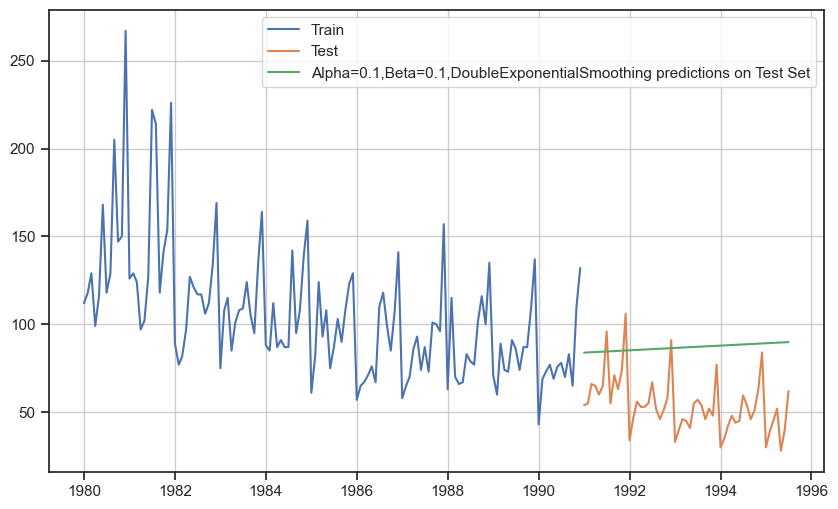

In [219]:
plt.figure(figsize=(10,6))
plt.plot(DES_train['Sales'], label='Train')
plt.plot(DES_test['Sales'], label='Test')
plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

#### Model Evaluation

In [220]:
resultsDf_6.sort_values(by=['Test RMSE']).head(9)

Alpha Values  Beta Values  Train RMSE   Test RMSE
0            0.1          0.1   34.439111   36.510010
1            0.1          0.2   33.450729   48.221436
10           0.2          0.1   33.097427   65.251675
2            0.1          0.3   33.145789   77.649847
20           0.3          0.1   33.611269   98.152852
3            0.1          0.4   33.262191   99.064536
11           0.2          0.2   33.591496  113.517477
4            0.1          0.5   33.688415  123.742433
30           0.4          0.1   34.255060  128.469994

In [221]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test RMSE
Linear Regression                                   51.080941
Naive Model                                         79.304391
Simple Average Model                                53.049755
2pointTrailingMovingAverage                         11.589082
4pointTrailingMovingAverage                         14.506190
6pointTrailingMovingAverage                         14.558008
9pointTrailingMovingAverage                         14.797139
Alpha=0.1,SimpleExponentialSmoothing                36.429535
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  36.510010

### Model 7: Triple Exponential Smoothing (Holt - Winter's Model)¶

In [222]:
TES_train = train.copy()
TES_test = test.copy()

In [223]:
model_TES_ta_sa = ExponentialSmoothing(TES_train['Sales'],trend='additive',seasonal='additive')
model_TES_ta_sm = ExponentialSmoothing(TES_train['Sales'],trend='additive',seasonal='multiplicative')
model_TES_tm_sm = ExponentialSmoothing(TES_train['Sales'],trend='multiplicative',seasonal='multiplicative')
model_TES_tm_sa = ExponentialSmoothing(TES_train['Sales'],trend='multiplicative',seasonal='additive')

In [224]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [225]:
model_TES_autofit_ta_sa = model_TES_ta_sa.fit(optimized=True)
model_TES_autofit_ta_sm = model_TES_ta_sm.fit(optimized=True)
model_TES_autofit_tm_sm = model_TES_tm_sm.fit(optimized=True)
model_TES_autofit_tm_sa = model_TES_tm_sa.fit(optimized=True)

In [226]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [227]:
model_TES_autofit_ta_sa.params

{'smoothing_level': 0.08830330642635406,
 'smoothing_trend': 6.730635331927582e-05,
 'smoothing_seasonal': 0.004455138229351625,
 'damping_trend': nan,
 'initial_level': 146.88752868155674,
 'initial_trend': -0.5492163940406024,
 'initial_seasons': array([-31.12207537, -18.81171138, -10.86052241, -21.52235816,
        -12.68359535,  -7.17529564,   2.7456236 ,   8.84900094,
          4.85724354,   2.9520333 ,  21.05004912,  63.29916317]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [228]:
model_TES_autofit_ta_sm.params

{'smoothing_level': 0.07132109562890512,
 'smoothing_trend': 0.04553831096563722,
 'smoothing_seasonal': 8.356711212063695e-07,
 'damping_trend': nan,
 'initial_level': 134.25655591779326,
 'initial_trend': -0.8038265942903572,
 'initial_seasons': array([0.83746068, 0.94985307, 1.03812083, 0.90732186, 1.02043162,
        1.11131741, 1.22228039, 1.30104211, 1.23132915, 1.20610008,
        1.40577823, 1.93832412]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [229]:
model_TES_autofit_tm_sm.params

{'smoothing_level': 0.0521696988178152,
 'smoothing_trend': 0.03546119906270268,
 'smoothing_seasonal': 0.00028476357235519487,
 'damping_trend': nan,
 'initial_level': 165.34400052966296,
 'initial_trend': 0.9923066985722868,
 'initial_seasons': array([0.68749747, 0.77992196, 0.85424762, 0.74551695, 0.83903295,
        0.91333126, 1.00288146, 1.06901269, 1.01412988, 0.99063168,
        1.15690782, 1.59275092]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [230]:
model_TES_autofit_tm_sa.params

{'smoothing_level': 0.04392379552557389,
 'smoothing_trend': 2.2382727020656378e-05,
 'smoothing_seasonal': 0.0005301252122432588,
 'damping_trend': nan,
 'initial_level': 141.25278376466085,
 'initial_trend': 0.993889634188071,
 'initial_seasons': array([-22.44377304, -10.02696656,  -1.98981311, -12.58528373,
         -3.74636822,   1.74412094,  11.67398645,  17.78894186,
         13.81217532,  11.92521254,  30.01867872,  72.29048742]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [231]:
TES_test['predict_ta_sa'] = model_TES_autofit_ta_sa.forecast(steps=len(test))
TES_test.head()

Year  Month  Sales  predict_ta_sa
YearMonth                                    
1991-01-01  1991      1   54.0      42.672382
1991-02-01  1991      2   55.0      54.439917
1991-03-01  1991      3   66.0      61.841877
1991-04-01  1991      4   65.0      50.636896
1991-05-01  1991      5   60.0      58.918913

In [232]:
TES_test['predict_ta_sm'] = model_TES_autofit_ta_sm.forecast(steps=len(test))
TES_test.head()

Year  Month  Sales  predict_ta_sa  predict_ta_sm
YearMonth                                                   
1991-01-01  1991      1   54.0      42.672382      56.334597
1991-02-01  1991      2   55.0      54.439917      63.692059
1991-03-01  1991      3   66.0      61.841877      69.388935
1991-04-01  1991      4   65.0      50.636896      60.452304
1991-05-01  1991      5   60.0      58.918913      67.770362

In [233]:
TES_test['predict_tm_sm'] = model_TES_autofit_tm_sm.forecast(steps=len(test))
TES_test.head()

Year  Month  Sales  predict_ta_sa  predict_ta_sm  predict_tm_sm
YearMonth                                                                  
1991-01-01  1991      1   54.0      42.672382      56.334597      55.894208
1991-02-01  1991      2   55.0      54.439917      63.692059      63.236692
1991-03-01  1991      3   66.0      61.841877      69.388935      69.062862
1991-04-01  1991      4   65.0      50.636896      60.452304      60.106162
1991-05-01  1991      5   60.0      58.918913      67.770362      67.444092

In [234]:
TES_test['predict_tm_sa'] = model_TES_autofit_tm_sa.forecast(steps=len(test))
TES_test.head()

Year  Month  Sales  predict_ta_sa  predict_ta_sm  predict_tm_sm  \
YearMonth                                                                     
1991-01-01  1991      1   54.0      42.672382      56.334597      55.894208   
1991-02-01  1991      2   55.0      54.439917      63.692059      63.236692   
1991-03-01  1991      3   66.0      61.841877      69.388935      69.062862   
1991-04-01  1991      4   65.0      50.636896      60.452304      60.106162   
1991-05-01  1991      5   60.0      58.918913      67.770362      67.444092   

            predict_tm_sa  
YearMonth                  
1991-01-01      43.085644  
1991-02-01      55.102106  
1991-03-01      62.741356  
1991-04-01      51.750473  
1991-05-01      60.196334

In [235]:
#Test Data

rmse_model_temp_ta_sa = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sa'],squared=False)
print("For Alpha =0.08621, Beta = 1.3722, Gamma = 0.4763 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Additive) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_ta_sa))

rmse_model_temp_ta_sm = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sm'],squared=False)
print("For Alpha =0.1542, Beta = 5.3100, Gamma = 0.3713 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Multiplicative) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_ta_sm))

rmse_model_temp_tm_sm = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sm'],squared=False)
print("For Alpha =0.1531, Beta = 1.3401, Gamma = 0.3691 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Multiplicative) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_tm_sm))

rmse_model_temp_tm_sa = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sa'],squared=False)
print("For Alpha =0.0831, Beta = 7.8624, Gamma = 0.4910 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Additive) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_tm_sa))

For Alpha =0.08621, Beta = 1.3722, Gamma = 0.4763 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Additive) forecast on the Test Data, RMSE is 14.149
For Alpha =0.1542, Beta = 5.3100, Gamma = 0.3713 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Multiplicative) forecast on the Test Data, RMSE is 19.753
For Alpha =0.1531, Beta = 1.3401, Gamma = 0.3691 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Multiplicative) forecast on the Test Data, RMSE is 20.307
For Alpha =0.0831, Beta = 7.8624, Gamma = 0.4910 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Additive) forecast on the Test Data, RMSE is 16.354


In [236]:
resultsDf_temp = pd.DataFrame({'Test RMSE': rmse_model_temp}
                           ,index=['Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Linear Regression                                   51.080941
Naive Model                                         79.304391
Simple Average Model                                53.049755
2pointTrailingMovingAverage                         11.589082
4pointTrailingMovingAverage                         14.506190
6pointTrailingMovingAverage                         14.558008
9pointTrailingMovingAverage                         14.797139
Alpha=0.1,SimpleExponentialSmoothing                36.429535
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  36.510010
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  37.192624

In [237]:
TES_train = train.copy()
TES_test = test.copy()
del resultsDf_7_2

## First we will define an empty dataframe to store our values from the loop

resultsDf_7_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': [],
                             'Method' : []})
resultsDf_7_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE, Method]
Index: []

In [243]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_ta_sa.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_ta_sa',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_ta_sa',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_ta_sa',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sa',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2 = ([resultsDf_7_2, pd.DataFrame.from_records([{'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                                         'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'ta_sa'}])],
                             ignore_index = True)
            resultsDf_7_2

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (4247054789.py, line 14)

In [ ]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_ta_sm.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_ta_sm',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_ta_sm',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_ta_sm',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sm',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2 = resultsDf_7_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'ta_sm'}
                                                 , ignore_index=True)


In [ ]:
for i in np.arange(0.1,1.0,0.1):
    for j in np.arange(0.1,1.0,0.1):
        for k in np.arange(0.1,1.0,0.1):
            model_TES_alpha_i_j_k = model_TES_tm_sm.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_tm_sm',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_tm_sm',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_tm_sm',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sm',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2 = resultsDf_7_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'tm_sm'}
                                                 , ignore_index=True)


In [ ]:
for i in np.arange(0.1,1.0,0.1):
    for j in np.arange(0.1,1.0,0.1):
        for k in np.arange(0.1,1.0,0.1):
            model_TES_alpha_i_j_k = model_TES_tm_sa.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_tm_sa',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_tm_sa',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_tm_sa',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sa',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2 = resultsDf_7_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'tm_sa'}
                                                 , ignore_index=True)

In [ ]:
TES_test.head()

#### Model Evaluation

In [ ]:
resultsDf_7_2.sort_values(by=['Test RMSE']).head()

In [ ]:
resultsDf_7_3 = pd.DataFrame({'Test RMSE': [resultsDf_7_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.2,Beta=0.7,Gamma=0.2,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_3])
resultsDf

In [ ]:
plt.figure(figsize=(18,9))
plt.plot(TES_train['Sales'], label='Train')
plt.plot(TES_test['Sales'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict_tm_sm', 0.2, 0.2, 0.70000000000000004], 
         label='Alpha=0.2,Beta=0.7,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

### 2.5 Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.


#### Applying Augmented Dickey-Fuller test whether the series has unit and whether it is stationary or non-stationary.

Hypothesis for the ADF test:

H0 : The Time Series has a unit root and is thus non-stationary (Null Hypothesis)

H1 : The Time Series does not have a unit root and is thus stationary. (Alternate Hypothesis)

We see that  for α = 5%, the Time Series is non-stationary.

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')
test_stationarity(rdf['Sales'])

In [ ]:
test_stationarity(rdf['Sales'].diff().dropna())

### 2.6 Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

### Arima Model

In [ ]:
import itertools
p = q = range(0, 4)
d= range(1,2) #since series is stationary at d=1
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

In [ ]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sales'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

In [ ]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

In [ ]:
auto_ARIMA = ARIMA(train['Sales'], order=(2,1,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

#### Model Evaluation

In [ ]:
# Prediction rsme
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

rmse = mean_squared_error(test['Sales'], predicted_auto_ARIMA.tolist(), squared=False)
print(rmse)

In [ ]:
results = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Auto_ARIMA'])

resultsDf = pd.concat([resultsDf, results])
resultsDf

### SARIMA Model

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

In [ ]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

In [ ]:
SARIMA_AIC.sort_values(by=['AIC']).head()

In [ ]:
auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                order=(3, 1, 1),
                                seasonal_order=(3, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

In [ ]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show();

#### Model Evaluation

In [ ]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

In [ ]:
rmse = mean_squared_error(test['Sales'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

In [ ]:
resultsDf_9_1 = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['(3,1,1),(3,0,2,12),Auto_SARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_9_1])
resultsDf

### 2.7 Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [ ]:
resultsDf.sort_values(by=['Test RMSE'])

### 2.8 Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [ ]:
date = pd.date_range(start='8/1/1995', end='7/1/1996', freq='MS')
date

In [ ]:
future_predictions=pd.DataFrame(columns=['Sales_Predictions'],index=date)

In [ ]:
TES_train = rdf.copy()

In [ ]:
model_TES_tm_sm = ExponentialSmoothing(TES_train['Sales'],trend='multiplicative',seasonal='multiplicative')
alpha=0.2
beta=0.8
gamma=0.2
model_TES = model_TES_tm_sm.fit(smoothing_level=alpha,smoothing_slope=beta,smoothing_seasonal=gamma,
                                optimized=False,use_brute=True)
prediction=model_TES.forecast(steps=12)

In [ ]:
future_predictions['Sales_Predictions']=prediction
future_predictions

In [ ]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_df = pd.DataFrame({'lower_CI':prediction - 1.96*np.std(model_TES.resid,ddof=1),
                          'prediction':prediction,
                          'upper_ci': prediction + 1.96*np.std(model_TES.resid,ddof=1)})
pred_df.head()

In [ ]:
# plot the forecast along with the confidence band

axis = rdf['Sales'].plot(label='Actual', figsize=(10,9))
pred_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()